In [434]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Uploading the image and reading it

In [435]:
img = files.upload()

Saving shinchan.jpg to shinchan.jpg


In [436]:
name = ''
for i in img:
  name = i
print(type(name))
name

<class 'str'>


'shinchan.jpg'

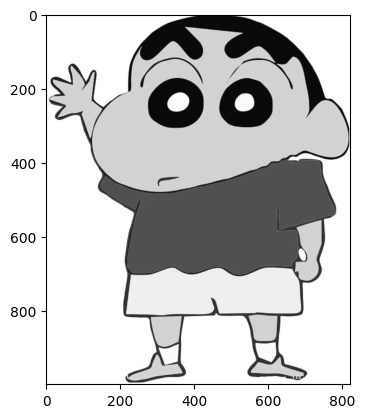

In [437]:
image = cv2.imread(name, cv2.IMREAD_GRAYSCALE)
image = image/255.0
plt.imshow(image, cmap = 'gray', vmin = 0, vmax = 1)

# Convolver Class

In [438]:
class Convolver:
  def __init__(self, img, kernel):
    self.img = img
    self.kernel = kernel
    self.shape = (int(img.shape[0] - kernel.shape[0] + 1), int(img.shape[1] - kernel.shape[1] + 1))
    self.result = np.zeros(self.shape)

  def relu(self): # Relu activation function
    self.result = np.where(self.result < 0, 0, self.result)

  def norm(self): # Normalizing the matrix
    self.result = (self.result - self.result.min()) / (self.result.max() - self.result.min())

  def convolve(self): # Convolution Operation
    for i in range(self.result.shape[0]):
      for j in range(self.result.shape[1]):

        for x in range(self.kernel.shape[0]):
          for y in range(self.kernel.shape[1]):
            self.result[i][j] += self.kernel[x][y] * self.img[i + x][j + y]
    self.relu()
    self.norm()
    return self.result

# Blurring the image

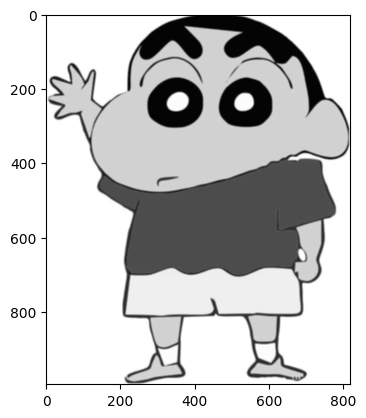

In [439]:
kernel = np.ones((5,5),np.float32)/25
blur = Convolver(image, kernel)
image = blur.convolve()
plt.imshow(image, cmap='gray', vmin=0, vmax=1)

# Robert Kernel

Defining the Robert kernel in the horizontal and vertical directions

In [440]:
robert_x = np.array([[0, 1], [-1, 0]])
robert_y = np.array([[1, 0,], [0, -1]])

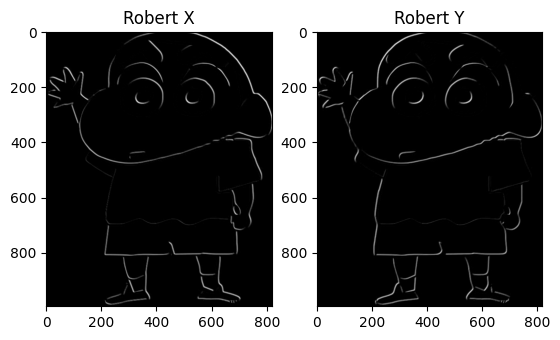

In [441]:
Rx = Convolver(image, robert_x)
Ry = Convolver(image, robert_y)
rx = Rx.convolve()
ry = Ry.convolve()
R = np.sqrt(np.square(rx) + np.square(ry))
plt.subplot(1, 2, 1)
plt.title("Robert X")
plt.imshow(rx, cmap='gray', vmin=0, vmax=1)
plt.subplot(1, 2, 2)
plt.title("Robert Y")
plt.imshow(ry, cmap='gray', vmin=0, vmax=1)

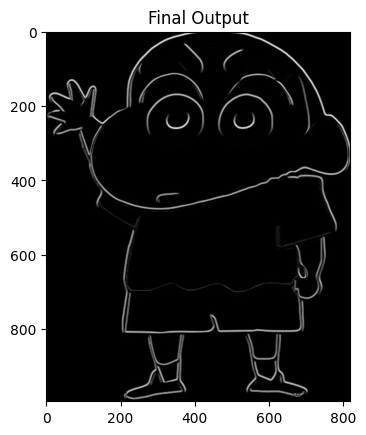

In [442]:
plt.title("Final Output")
plt.imshow(R, cmap='gray', vmin=0, vmax=1)

# Sobel Kernel

Defining the Sobel kernel in the horizontal and vertical directions

In [443]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

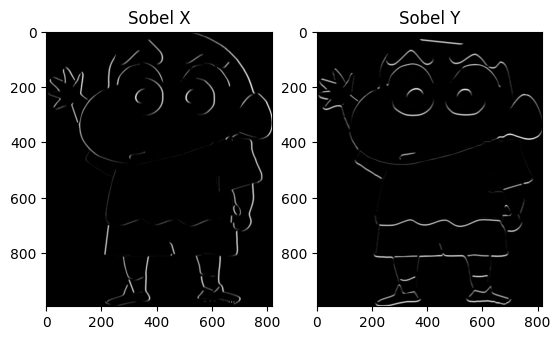

In [444]:
Gx = Convolver(image, sobel_x)
Gy = Convolver(image, sobel_y)
gx = Gx.convolve()
gy = Gy.convolve()
G = np.sqrt(np.square(gx) + np.square(gy))

plt.subplot(1, 2, 1)
plt.title("Sobel X")
plt.imshow(gx, cmap='gray', vmin=0, vmax=1)
plt.subplot(1, 2, 2)
plt.title("Sobel Y")
plt.imshow(gy, cmap='gray', vmin=0, vmax=1)

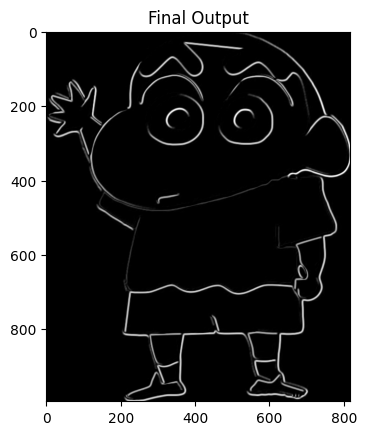

In [445]:
plt.title("Final Output")
plt.imshow(G, cmap='gray', vmin=0, vmax=1)

# Scharr Kernel

Defining the Scharr kernel in the horizontal and vertical directions

In [446]:
scharr_x = np.array([[-3, 0, 3], [-10, 0, 10], [-3, 0, 3]])
scharr_y = np.array([[-3, -10, -3], [0, 0, 0], [3, 10, 3]])

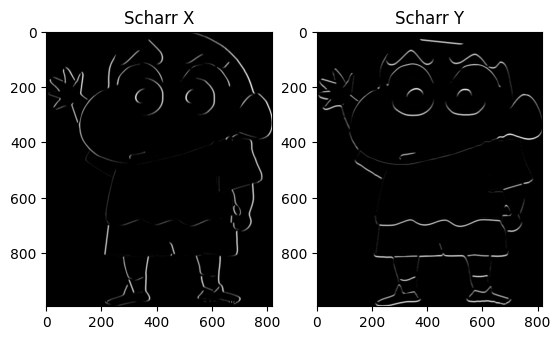

In [447]:
Sx = Convolver(image, scharr_x)
Sy = Convolver(image, scharr_y)
sx = Sx.convolve()
sy = Sy.convolve()
S = np.sqrt(np.square(sx) + np.square(sy))

plt.subplot(1, 2, 1)
plt.title("Scharr X")
plt.imshow(sx, cmap='gray', vmin=0, vmax=1)
plt.subplot(1, 2, 2)
plt.title("Scharr Y")
plt.imshow(sy, cmap='gray', vmin=0, vmax=1)

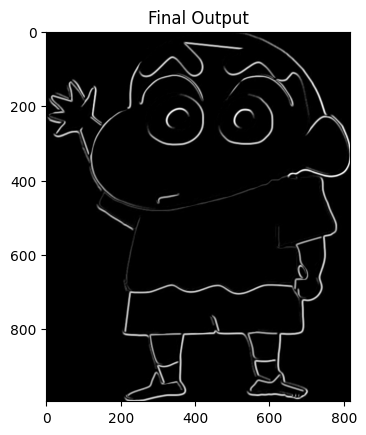

In [448]:
plt.title("Final Output")
plt.imshow(S, cmap='gray', vmin=0, vmax=1)